In [140]:
import pandas as pd
import numpy as np


from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import os


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import Imputer, RobustScaler, FunctionTransformer

%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")


In [232]:
df = pd.read_csv("LendingClubCleaned_num.csv")

In [206]:
#df.drop(['defaulted', 'completed'], axis=1, inplace=True)


In [207]:
df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,AmountLoanPaid
0,5000.0,5000.0,4975.0,162.87,24000.0,27.65,0.0,1.0,35.017618,3.0,...,0.00,171.62,0.0,1.0,0.0,0.0,0.0,0.0,0.0,863.155187
1,2500.0,2500.0,2500.0,59.83,30000.0,1.00,0.0,5.0,35.017618,3.0,...,1.11,119.66,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1485.470000
2,2400.0,2400.0,2400.0,84.33,12252.0,8.72,0.0,2.0,35.017618,2.0,...,0.00,649.91,0.0,1.0,0.0,0.0,0.0,0.0,0.0,605.666844
3,10000.0,10000.0,10000.0,339.31,49200.0,20.00,0.0,1.0,35.000000,10.0,...,0.00,357.48,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2231.890000
4,3000.0,3000.0,3000.0,67.79,80000.0,17.94,0.0,0.0,38.000000,15.0,...,0.00,67.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1066.908161


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 31 columns):
loan_amnt                     42542 non-null float64
funded_amnt                   42542 non-null float64
funded_amnt_inv               42542 non-null float64
installment                   42542 non-null float64
annual_inc                    42542 non-null float64
dti                           42542 non-null float64
delinq_2yrs                   42542 non-null float64
inq_last_6mths                42542 non-null float64
mths_since_last_delinq        42542 non-null float64
open_acc                      42542 non-null float64
pub_rec                       42542 non-null float64
revol_bal                     42542 non-null float64
total_acc                     42542 non-null float64
out_prncp                     42542 non-null float64
out_prncp_inv                 42542 non-null float64
total_pymnt                   42542 non-null float64
total_pymnt_inv               42542 non-nul

# Linear Regression

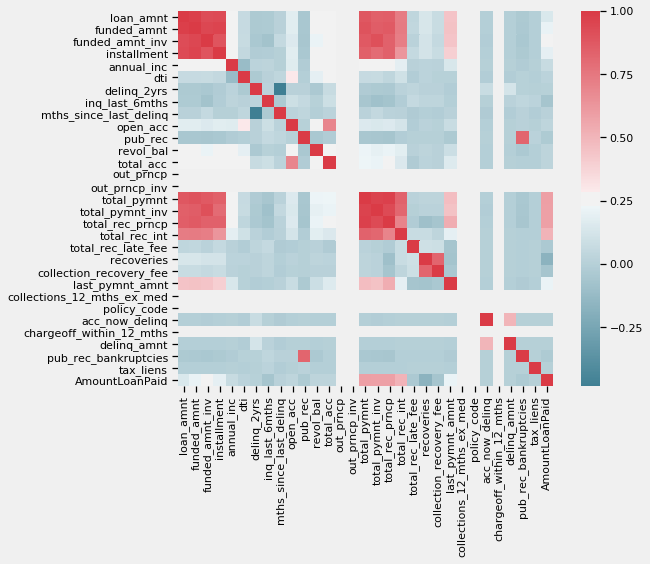

In [279]:
# Correlation matrix
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.tight_layout() 
plt.savefig('Correlation_matrix.png')

import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split


In [1]:
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split

df = df.select_dtypes(exclude=[np.object])

df = df.fillna(df.mean())

df.info()

X = df.drop(['AmountLoanPaid'], axis=1)
y = df[['AmountLoanPaid']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for df, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][df]))

# Test set accuracy
regression_model.score(X_test, y_test)

y_pred = regression_model.predict(X_test)

from sklearn import metrics
print(f"Mean absolute error of linear regression = {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error of linear regression = {metrics.mean_squared_error(y_test, y_pred)}")

NameError: name 'df' is not defined

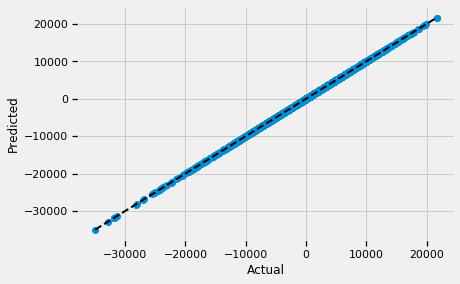

In [245]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Random Forest Regression

In [254]:
df = pd.read_csv("LendingClubCleaned_num.csv")

#One-hot encode the data using pandas get_dummies
df = pd.get_dummies(df)

df.info()

#for col in df.columns:
#    print(col)

#type(df['AmountLoanPaid'])

features = df

features

# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['AmountLoanPaid'])
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('AmountLoanPaid', axis = 1)
#features = features[['percent_received_90', 'percent_locked', 'utilization_rate', 'days_til_lockout', 'amount_received_in_last_30d_exc_deposit', 'max_consecutive_days_locked', 'amount_expected', 'percent_loan_duration_elapsed', 'days_locked_in_last_30d', 'kit_price', 'payment_preference_monthly']]
# Saving feature names for later use
features_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Initiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

print(metrics.mean_absolute_error(test_labels, predictions))
print(metrics.mean_squared_error(test_labels, predictions))
#RMSE
print(np.sqrt(metrics.mean_squared_error(test_labels, predictions)))

from sklearn.metrics import r2_score
test_score = r2_score(test_labels, predictions)
print(test_score)

plt.scatter(test_labels, predictions)
plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout() 
plt.savefig('Random_Forest_Actual_Predicted.png')


plt.show()



In [267]:
 # Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: recoveries           Importance: 0.35
Variable: total_rec_int        Importance: 0.29
Variable: loan_amnt            Importance: 0.16
Variable: total_pymnt          Importance: 0.11
Variable: total_rec_prncp      Importance: 0.06
Variable: funded_amnt          Importance: 0.01
Variable: total_pymnt_inv      Importance: 0.01
Variable: funded_amnt_inv      Importance: 0.0
Variable: installment          Importance: 0.0
Variable: annual_inc           Importance: 0.0
Variable: dti                  Importance: 0.0
Variable: delinq_2yrs          Importance: 0.0
Variable: inq_last_6mths       Importance: 0.0
Variable: mths_since_last_delinq Importance: 0.0
Variable: open_acc             Importance: 0.0
Variable: pub_rec              Importance: 0.0
Variable: revol_bal            Importance: 0.0
Variable: total_acc            Importance: 0.0
Variable: out_prncp            Importance: 0.0
Variable: out_prncp_inv        Importance: 0.0
Variable: total_rec_late_fee   Importance: 0.0
Vari

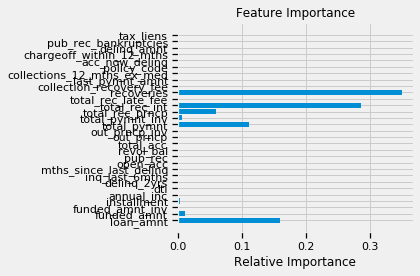

In [269]:
plt.figure(1)
plt.title('Feature Importance')
x_values = list(range(len(importances)))
plt.barh(x_values,  importances, align='center')
plt.yticks(x_values, features_list)
plt.xlabel('Relative Importance')
plt.tight_layout() 